## `raw2fits` - Convert camera's raw images to FITS files

In [1]:
from raw2fits.image import Image
img = Image(path='../../tests/img/test.CR2', debayer_method="VNG")
# img.save_fits(image_type="LIGHT", path='path/to/save/fits/image')

Reading image...
Debayering (VNG, 3670 x 5496)...


  0%|          | 0/20170320 [00:00<?, ?it/s]

In [2]:
print(img.path)
print(img.file_extension)
print(img.image_size)
print(img.bayer_image.shape)
print(img.debayer_image.shape)


../../tests/img/test.CR2
.CR2
(3670, 5496)
(3670, 5496)
(3, 3670, 5496)


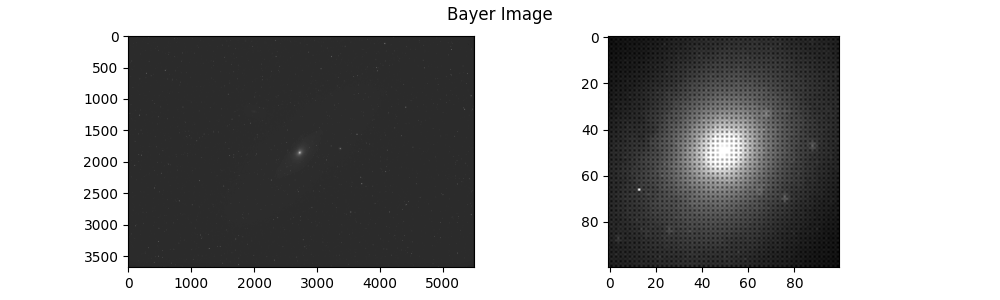

In [3]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].imshow(img.bayer_image, cmap='gray')
ax[1].imshow(img.bayer_image[1804:1904, 2678:2778], cmap='gray')
plt.suptitle("Bayer Image")
plt.show(fig)

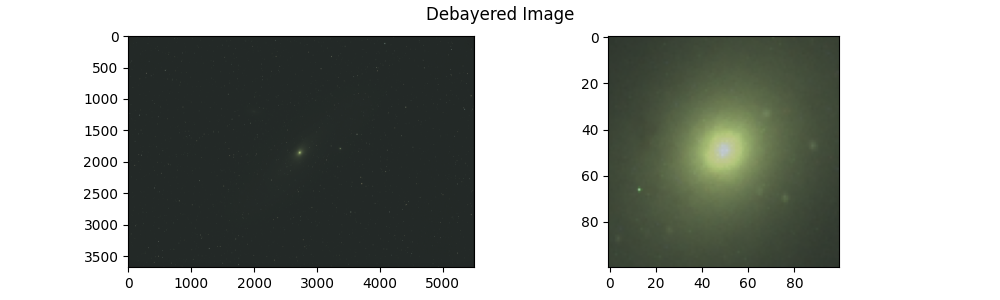

In [4]:
debayer_image_norm = np.moveaxis(img.debayer_image, 0, -1).astype(np.float32) # for imshow
debayer_image_norm /= np.max(debayer_image_norm, axis=(0, 1)) # normalize to 0-1

fig, ax = plt.subplots(1, 2, figsize=(10, 3))
ax[0].imshow(debayer_image_norm)
ax[1].imshow(debayer_image_norm[1804:1904, 2678:2778])
plt.suptitle("Debayered Image")
plt.show(fig)

In [11]:
# Save the image as a FITS file.
# image_type: "LIGHT", "DARK", "FLAT", "BIAS"
# path: path to save the file to. If None, save to the same directory as the image.

img.save_fits(image_type="LIGHT", path='../../tests/img')

Saving FITS file to ../../tests/img\test.fits


In [18]:
from astropy.io import fits
from pprint import pprint

with fits.open('../../tests/img/test.fits') as hdul:
    print(hdul.info())

    pprint(hdul[0].header)
    print(hdul[0].data.shape)

    data = hdul[0].data

    # show the data from saved fits and thr original debayered image are the same
    print(np.all(data == img.debayer_image))


Filename: ../../tests/img/test.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      24   (5496, 3670, 3)   int16 (rescales to uint16)   
None
SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                   16 / array data type                                
NAXIS   =                    3 / Dimensionality                                 
NAXIS1  =                 5496                                                  
NAXIS2  =                 3670                                                  
NAXIS3  =                    3                                                  
EXTEND  =                    T / Extensions are permitted                       
BSCALE  =                    1                                                  
BZERO   =                32768                                                  
IMAGETYP= 'LIGHT   '           / Type of exposure                             